In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing

In [159]:
df = pd.read_csv("dataset.csv")

In [160]:
df.rename(columns={col: col.lower().replace(
                " ", "_") for col in df.columns.values.tolist()}, inplace=True)

df

,unnamed:_0,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
0,0,1000,2016-02-02,-101,0,10,1576.89,n
1,1,1001,NaN,5901,969,35,4286.64,n
2,2,1002,NaN,5510,188,20,3022.26,n
3,3,1003,2016-06-02,5964,827,24,4008.96,n
4,4,1004,NaN,5386,915,39,6604.64,n
...,...,...,...,...,...,...,...,...
995,995,1995,2016-03-01,5801,553,28,2700.14,d
996,996,1996,2016-01-14,5751,961,20,3981.01,a
997,997,1997,2016-03-02,5207,486,39,1504.26,c
998,998,1998,2016-03-02,5208,259,24,2452.02,a


In [161]:
df[["quantity_purchased"]].values[0:10, 0]

array([10, 35, 20, 24, 39, 16, 38, 12, 17, 29])

Usando el name de la columna, y devolviendo los valores de la misma.
También se puede:

In [162]:
df.quantity_purchased.values[0:10]

array([10, 35, 20, 24, 39, 16, 38, 12, 17, 29])

In [163]:
df.select_dtypes(include=["float64"]).values[:10, 0]

array([1576.89, 4286.64, 3022.26, 4008.96, 6604.64, 1311.74, 1559.14,
       4801.32, 3918.11, 1182.73])

select_dtypes ignora las columnas y solo toma en consideración el tipo del valor

In [164]:
df.iloc[[10, 501, 20]]

,unnamed:_0,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
10,10,1010,NaN,5252,654,24,4659.53,n
501,501,1501,2016-01-14,5901,969,24,3311.96,a
20,20,1020,2016-03-02,5208,221,10,825.62,n


iloc usado de esta manera ([[]]), lo que hace es devolverte las filas seleccionadas. En este caso la 10, 501 y la 20

In [165]:
df.iloc[1, 3]

5901

Pero también se puede usar así  para devolver el valor de una columna/fila específca. Donde el primer argumento indica el número de la fila y el segundo el de la columna

In [166]:
df.drop([0,24,51], axis=0)

,unnamed:_0,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
1,1,1001,NaN,5901,969,35,4286.64,n
2,2,1002,NaN,5510,188,20,3022.26,n
3,3,1003,2016-06-02,5964,827,24,4008.96,n
4,4,1004,NaN,5386,915,39,6604.64,n
5,5,1005,NaN,5137,665,16,1311.74,n
...,...,...,...,...,...,...,...,...
995,995,1995,2016-03-01,5801,553,28,2700.14,d
996,996,1996,2016-01-14,5751,961,20,3981.01,a
997,997,1997,2016-03-02,5207,486,39,1504.26,c
998,998,1998,2016-03-02,5208,259,24,2452.02,a


el método drop lo que hace es eliminar las filas especificadas. También se puede pasar axis=1, para eliminar columnas.

In [167]:
df[df.quantity_purchased>25].head()

,unnamed:_0,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
1,1,1001,NaN,5901,969,35,4286.64,n
4,4,1004,NaN,5386,915,39,6604.64,n
6,6,1006,2016-01-26,5710,271,38,1559.14,n
9,9,1009,NaN,5984,672,29,1182.73,n
16,16,1016,NaN,5942,113,30,1380.98,n


Acá pandas nos permite seleccionar según valores booleanos. En este ejemplo devuelve el dataset solo donde la cantidad comprada es mayor a 25

In [168]:
df[100:].head()

,unnamed:_0,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
100,100,1100,2016-10-01,5704,122,32,2157.08,c
101,101,1101,2016-01-20,5901,969,30,2265.24,b
102,102,1102,2016-06-01,5510,188,24,2746.75,a
103,103,1103,2016-01-14,5964,827,37,4002.73,d
104,104,1104,2016-01-16,5386,915,3,2841.32,b


In [169]:
df["date"] = pd.to_datetime(df.date)
df.dtypes

unnamed:_0                     int64
serial_no                      int64
date                  datetime64[ns]
user_id                        int64
product_id                     int64
quantity_purchased             int64
price                        float64
user_type                     object
dtype: object

Typecasting consiste en llevar al tipo de dato adecuado a todos los datos. to_datetime nos permite tener un tipo de fecha *date* en vez de un objeto.
También, por ejemplo, es de utilidad del método to_numeric, para convertir los valores a números.

In [170]:
def expand_user_type(u_type):
    if u_type in ["a", "b"]:
        return "new"
    elif u_type == "c":
        return "existing"
    elif u_type == "d":
        return "loyal_existing"
    else:
        return "error"

In [171]:
df["user_class"] = df["user_type"].map(expand_user_type)

Con *map* se mapea todos los valores de la columna *user_type*, y para cada valor se le aplica la función **expand_user_type**. map solo aplica para Series y no para Dataframes.

In [172]:
df["purchase_week"] = df[["date"]].applymap(lambda dt: dt.week
                                                    if not pd.isnull(dt.week)
                                                    else 0
                                           )
df["purchase_week"]

0       5
1       0
2       0
3      22
4       0
       ..
995     9
996     2
997     9
998     9
999    31
Name: purchase_week, Length: 1000, dtype: int64

Applymap hace lo mismo que map, pero esta vez se enfoca en los dataframe en vez de las series.

In [173]:
df.select_dtypes(include=[np.number]).apply(lambda x: x.max() - x.min())

unnamed:_0             999.00
serial_no             2000.00
user_id               6086.00
product_id            1095.00
quantity_purchased      40.00
price                 7818.25
purchase_week           53.00
dtype: float64

y apply sirve para aplicar una funcion a lo largo de los valores de un dataframe o de una serie

In [174]:
df_dropped = df.dropna(subset=["date"])
df_dropped.shape, df.shape

((969, 10), (1000, 10))

dropna va a eliminar todas las filas de la columna *date* que sean null

In [175]:
df_dropped["price"].fillna(value=np.round(df.price.mean(),2), inplace=True)

/home/francisco/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Se cambian los valores null en la columna de precios por la media del dataframe

In [176]:
df_dropped["user_type"].fillna(method="ffill", inplace=True)

El método ffill (forward fill) lo que hace es completar el valor NaN con el siguiente valor de la siguiente fila

In [177]:
df_dropped["user_type"].fillna(method="bfill", inplace=True)
df_dropped

,unnamed:_0,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week
0,0,1000,2016-02-02,-101,0,10,1576.89,n,error,5
3,3,1003,2016-06-02,5964,827,24,4008.96,n,error,22
6,6,1006,2016-01-26,5710,271,38,1559.14,n,error,4
8,8,-1,2016-01-30,5718,451,17,3918.11,n,error,4
13,13,1013,2016-05-02,5801,783,2,6068.04,n,error,18
...,...,...,...,...,...,...,...,...,...,...
995,995,1995,2016-03-01,5801,553,28,2700.14,d,loyal_existing,9
996,996,1996,2016-01-14,5751,961,20,3981.01,a,new,2
997,997,1997,2016-03-02,5207,486,39,1504.26,c,existing,9
998,998,1998,2016-03-02,5208,259,24,2452.02,a,new,9


El método bfill (backward fill) completa los valores NaN pero con el valor de la fila anterior.

In [178]:
df_dropped[df_dropped.duplicated(subset=["serial_no"])]

,unnamed:_0,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week
22,22,-1,2016-01-19,5321,466,2,2572.24,d,loyal_existing,3
54,54,-1,2016-03-02,5339,266,2,854.30,a,new,9
91,91,-1,2016-04-02,5091,178,34,471.40,c,existing,13
106,106,-1,2016-07-02,5710,271,37,949.03,c,existing,26
158,158,-1,2016-01-17,5805,674,7,519.93,d,loyal_existing,2
188,188,-1,2016-04-01,5983,365,20,5024.93,a,new,13
194,194,-1,2016-01-16,5554,132,29,318.87,d,loyal_existing,2
292,292,-1,2016-03-01,5260,1015,6,23.50,b,new,9
325,325,-1,2016-01-20,5692,371,39,5103.98,a,new,3
374,374,-1,2016-05-01,5006,365,33,2082.19,c,existing,17


Acá nos muestra las filas donde la columna series_no está duplicada de valores

In [179]:
df_dropped.drop_duplicates(subset=["serial_no"], inplace=True)

<ipython-input-179-a7b08f996ad9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped.drop_duplicates(subset=["serial_no"], inplace=True)


En la línea de arriba se eliminan las filas donde los valores de serial_no están duplicados.

In [180]:
type_map={"a":0, "b":1, "c":2, "d":3, np.NAN: -1}
df["encoded_user_type"] = df.user_type.map(type_map)
df

,unnamed:_0,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week,encoded_user_type
0,0,1000,2016-02-02,-101,0,10,1576.89,n,error,5,NaN
1,1,1001,NaT,5901,969,35,4286.64,n,error,0,NaN
2,2,1002,NaT,5510,188,20,3022.26,n,error,0,NaN
3,3,1003,2016-06-02,5964,827,24,4008.96,n,error,22,NaN
4,4,1004,NaT,5386,915,39,6604.64,n,error,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
995,995,1995,2016-03-01,5801,553,28,2700.14,d,loyal_existing,9,3.0
996,996,1996,2016-01-14,5751,961,20,3981.01,a,new,2,0.0
997,997,1997,2016-03-02,5207,486,39,1504.26,c,existing,9,2.0
998,998,1998,2016-03-02,5208,259,24,2452.02,a,new,9,0.0


Acá reemplazamos los valores categóricos por números. En este caso, según la letra en la que el usuario esté identificado, se le dará un valor numérico.

In [181]:
pd.get_dummies(df,columns=["user_type"])

,unnamed:_0,serial_no,date,user_id,product_id,quantity_purchased,price,user_class,purchase_week,encoded_user_type,user_type_a,user_type_b,user_type_c,user_type_d,user_type_n
0,0,1000,2016-02-02,-101,0,10,1576.89,error,5,NaN,0,0,0,0,1
1,1,1001,NaT,5901,969,35,4286.64,error,0,NaN,0,0,0,0,1
2,2,1002,NaT,5510,188,20,3022.26,error,0,NaN,0,0,0,0,1
3,3,1003,2016-06-02,5964,827,24,4008.96,error,22,NaN,0,0,0,0,1
4,4,1004,NaT,5386,915,39,6604.64,error,0,NaN,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1995,2016-03-01,5801,553,28,2700.14,loyal_existing,9,3.0,0,0,0,1,0
996,996,1996,2016-01-14,5751,961,20,3981.01,new,2,0.0,1,0,0,0,0
997,997,1997,2016-03-02,5207,486,39,1504.26,existing,9,2.0,0,0,1,0,0
998,998,1998,2016-03-02,5208,259,24,2452.02,new,9,0.0,1,0,0,0,0


En esta, en cambio, la función get_dummies lo que hace es crear nuevas columnas con cada categoría y darle un 1 si el usuario pertenece a esa categoría o un cero si no lo hace.

In [182]:
df_normalized = df.dropna().copy()
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_normalized["price"].values.reshape(-1,1))
df_normalized["normalized_price"] = np_scaled.reshape(-1,1)

df_normalized.head()

,unnamed:_0,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week,encoded_user_type,normalized_price
17,17,1017,2016-06-02,5486,400,1,2046.53,d,loyal_existing,22,3.0,0.261404
18,18,1018,2016-01-21,5229,833,18,963.05,d,loyal_existing,3,3.0,0.122820
19,19,1019,2016-02-02,5941,209,38,1651.43,b,new,5,1.0,0.210868
22,22,-1,2016-01-19,5321,466,2,2572.24,d,loyal_existing,3,3.0,0.328645
26,26,1026,2016-03-01,5477,708,26,884.75,d,loyal_existing,9,3.0,0.112805


In [185]:
df["price"][df["user_type"] == "a"].mean()

2261.04487394958

Esta línea nos indica el precio medio de los compradores tipo "a"

In [187]:
df["purchase_week"].value_counts()

4     152
3     146
2     117
5      52
39     51
31     50
13     50
26     49
9      49
22     46
53     44
35     43
48     39
0      31
44     30
18     27
17     24
Name: purchase_week, dtype: int64

value_counts nos indica la cantidad de valores diferentes que hay en una columna, en este caso purchase_week

In [191]:
df.groupby(["user_class"])["quantity_purchased"].sum()

user_class
error               631
existing           4932
loyal_existing     5040
new               10761
Name: quantity_purchased, dtype: int64

Esta linea indica la cantidad comprada según la clase del usuario.

In [193]:
df.groupby(["user_class"])["quantity_purchased"].agg([np.sum, np.mean, np.count_nonzero])

,sum,mean,count_nonzero
user_class,,,
error,631,20.354839,31
existing,4932,21.537118,229
loyal_existing,5040,20.079681,251
new,10761,22.006135,489


Acá podemos observar distintos datos según la user_class. agg ayuda a agregar los distintos datos que queremos observar. En este caso, los valores que no son ceros, la media y la sumatoria

In [201]:
df.groupby(["user_class", "user_type"]).agg({"price": np.mean,
                                            "quantity_purchased": np.max
                                            })

price  quantity_purchased
user_class     user_type                                 
error          n          2877.397742                  40
existing       c          2442.807803                  41
loyal_existing d          2338.585679                  41
new            a          2261.044874                  41
               b          2297.958333                  41

Acá se muestrarn distintos datos de interés donde se relacionan dos columnas diferentes: el user_class y el user_type

# Visualization

Text(0.5, 1.0, 'Price Trends for Particular User')

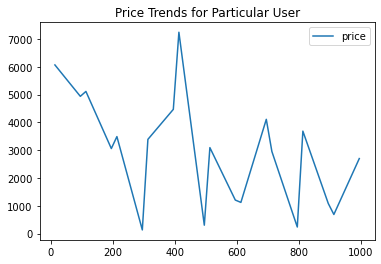

In [223]:
individual_user = df[df.user_id == 5801]
individual_user_price = individual_user_price[["price"]].fillna(individual_user_price.mean())

individual_user_price.plot()
plt.title("Price Trends for Particular User")

Acá vemos ploteada los diferentes precios para un usuario en particular

Text(0.5, 1.0, 'Prices trend according date')

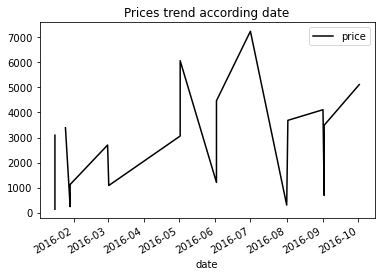

In [227]:
individual_user.plot(x="date", y="price", style="black")
plt.title("Prices trend according date")

Acá se pasa directamente la variable dependiente e independiente del dataset. Nos muestra la tendencia de los precios en relación al paso de las fechas.

Text(0.5, 1.0, 'Quantities Purchased per Week')

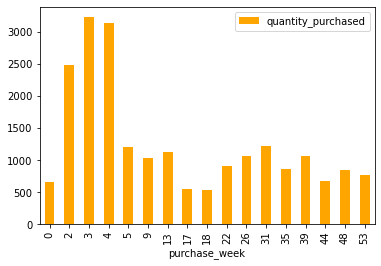

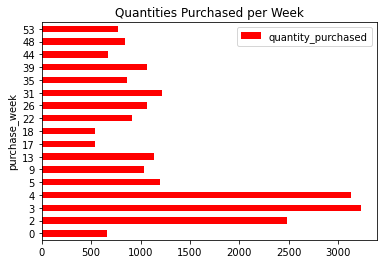

In [235]:
df[["purchase_week", "quantity_purchased"]].groupby("purchase_week").sum().plot.bar(color="orange")
df[["purchase_week", "quantity_purchased"]].groupby("purchase_week").sum().plot.barh(color="red")
plt.title("Quantities Purchased per Week")

En este punto, se grafica la cantidad comprada en según la semana. Barh nos devuelve una gráfica de horizontal, y bar una vertical.

Text(0.5, 1.0, 'Price distribution')

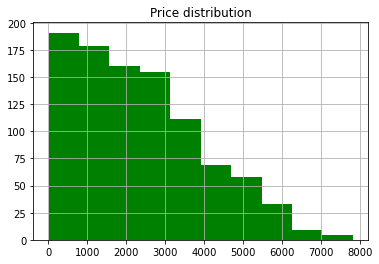

In [237]:
df.price.hist(color="green")
plt.title("Price distribution")

con el método hist, nos permite graficar un histograma

Text(0.5, 1.0, 'Prices by weeks')

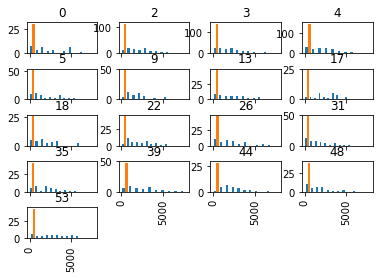

In [241]:
df[["price", "purchase_week"]].hist(by="purchase_week", sharex=True)
plt.title("Prices by weeks")

Acá se visualiza el precio en relación a las semanas.

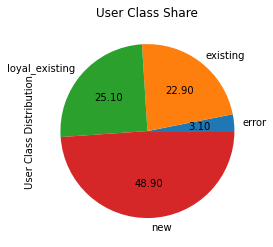

In [243]:
class_series = df.groupby("user_class").size()
class_series.name = "User Class Distribution"
class_series.plot.pie(autopct="%.2f")
plt.title("User Class Share")
plt.show()

En este snippet, graficamos un *pie chart* que nos indica la distribución de las clases de usuario, donde notamos que alrededor del 50% son nuevos usuarios.

Text(0.5, 1.0, 'Quantity and Week value distribution')

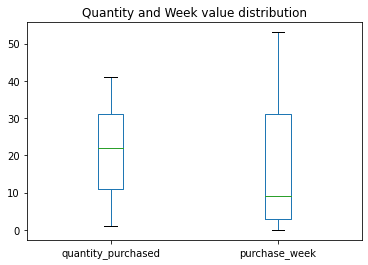

In [245]:
df[["quantity_purchased", "purchase_week"]].plot.box()
plt.title("Quantity and Week value distribution")

Este plot nos dice que el rando de semanas va desde 53 hasta 0, y que la mayoría de las compras fueron realizadas en la semana 10.

In [261]:
uclass_map = {"new": 1, "existing":2, "loyal_existing": 3, "error":0}
df["enc_uclass"] = df.user_class.map(uclass_map)
bubble_df = df[["enc_uclass", 
                "purchase_week", 
                "price", 
                "product_id"]].groupby(
                        ["purchase_week", "enc_uclass"]).agg({
                        "price": "mean",
                        "product_id": "count"
                    }).reset_index()
bubble_df.rename(columns={"product_id": "total_transactions"}, inplace=True)

bubble_df.head()

,purchase_week,enc_uclass,price,total_transactions
0,0,0,2682.090000,16
1,0,1,2304.148333,7
2,0,2,1627.740000,4
3,0,3,2756.120000,4
4,2,0,2913.630000,1


Acá se realizan un par de transformaciones

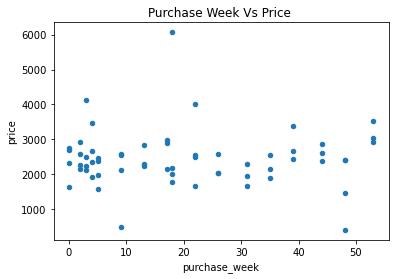

In [263]:
bubble_df.plot.scatter(x="purchase_week",
                       y="price")
plt.title("Purchase Week Vs Price ")
plt.show()

Se grafica un scatter que muestra el precio en relación a la semana de compra.

Text(0.5, 1.0, 'Purchase week Vs Price Per User Class based on Tx')

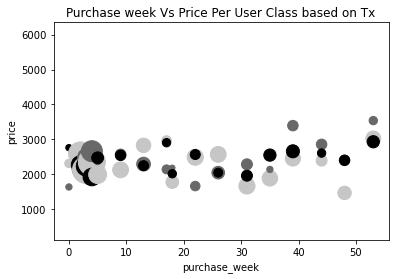

In [266]:
bubble_df.plot.scatter(x="purchase_week",
                       y="price",
                       c=bubble_df["enc_uclass"],
                       s=bubble_df["total_transactions"]*10
                      )
plt.title("Purchase week Vs Price Per User Class based on Tx")

# Visualizing with Matplotlib

In [268]:
x = np.linspace(-10, 10, 50)
y = np.sin(x)


Text(0, 0.5, 'y-axis')

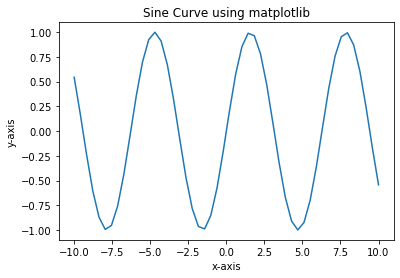

In [270]:
plt.plot(x, y)
plt.title("Sine Curve using matplotlib")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

Text(0, 0.5, 'y-label')

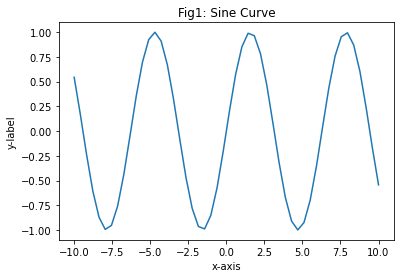

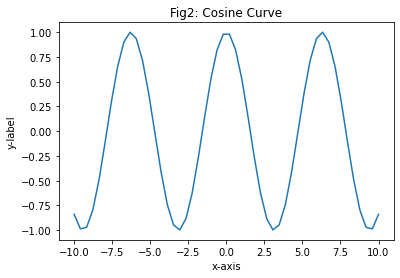

In [271]:
# first figure
plt.figure(1)
plt.plot(x, y)
plt.title("Fig1: Sine Curve")
plt.xlabel("x-axis")
plt.ylabel("y-label")

# second figure
plt.figure(2)
y=np.cos(x)
plt.plot(x, y)
plt.title("Fig2: Cosine Curve")
plt.xlabel("x-axis")
plt.ylabel("y-label")

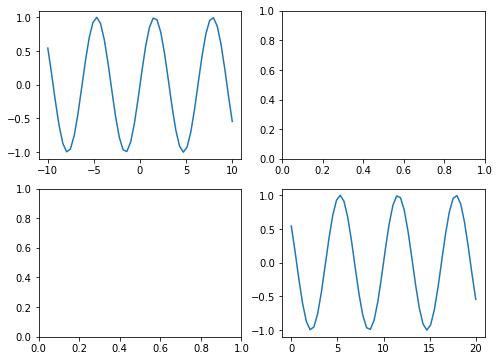

In [273]:
y = np.sin(x)
figure_obj = plt.figure(figsize=(8,6))
ax1 = figure_obj.add_subplot(2,2,1)
ax1.plot(x,y)

ax2 = figure_obj.add_subplot(2,2,2)
ax3 = figure_obj.add_subplot(2,2,3)
ax4 = figure_obj.add_subplot(2,2,4)

ax4.plot(x+10, y)

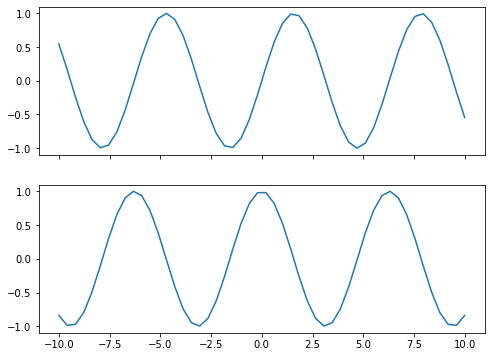

In [275]:
fig, ax_list = plt.subplots(2,1,sharex=True,figsize=(8,6))
y = np.sin(x)
ax_list[0].plot(x, y)

y = np.cos(x)
ax_list[1].plot(x, y)

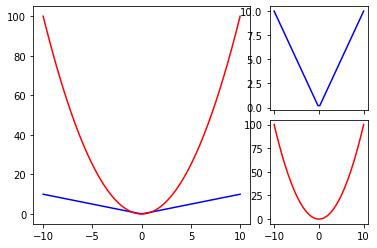

In [281]:
y = np.abs(x)
z = x**2

plt.subplot2grid((4,3), (0, 0), rowspan=4, colspan=2)
plt.plot(x, y, "b", x, z, "r")

ax2 = plt.subplot2grid((4,3), (0,2), rowspan=2)
plt.plot(x, y, "b")
plt.setp(ax2.get_xticklabels(), visible=False)

plt.subplot2grid((4,3), (2,2), rowspan=2)
plt.plot(x,z, "r")

[None, None, None, None, None, None, None, None, None, None]

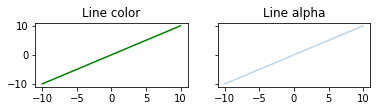

In [287]:
y = x

# Color
ax1 = plt.subplot(321)
plt.plot(x, y, color="green")
ax1.set_title("Line color")

# Alpha
ax2 = plt.subplot(322, sharex=ax1)
alpha = plt.plot(x,y)
alpha[0].set_alpha(.3)
ax2.set_title("Line alpha")
plt.setp(ax2.get_yticklabels(), visible=False)

[None, None, None, None, None, None, None, None, None, None]

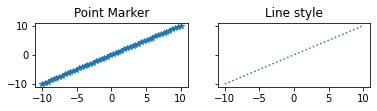

In [292]:
# maker
# markers -> +, o, *, s, ,, ., etc
ax3 = plt.subplot(323, sharex=ax1)
plt.plot(x,y,marker="*")
ax3.set_title("Point Marker")

# linestyle
# linestyles -> -, --, -., :, steps
ax4 = plt.subplot(324, sharex=ax1)
plt.plot(x,y,linestyle=":")
ax4.set_title("Line style")
plt.setp(ax4.get_yticklabels(), visible=False)

Text(0.5, 1.0, 'Legend sample')

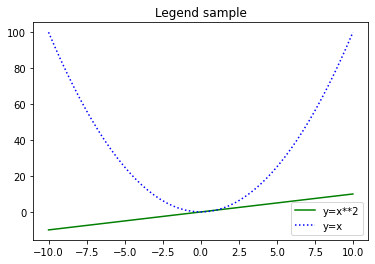

In [293]:
plt.plot(x, y, "g", label="y=x**2")
plt.plot(x,z, "b:", label="y=x")
plt.legend(loc="best")
plt.title("Legend sample")

Text(0.5, 1.0, 'Legend with $LaTEX$ formatting')

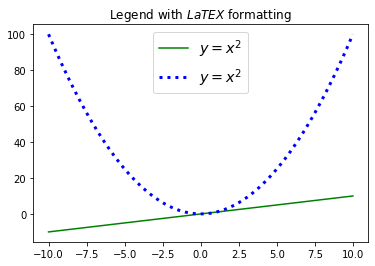

In [295]:
# legend with latex formatting
plt.plot(x,y,"g", label="$y = x^2$")
plt.plot(x,z,"b:", linewidth=3, label="$y = x^2$")
plt.legend(loc="best", fontsize="x-large")
plt.title("Legend with $LaTEX$ formatting")

Text(0.5, 1.0, 'Secondary Y Axis')

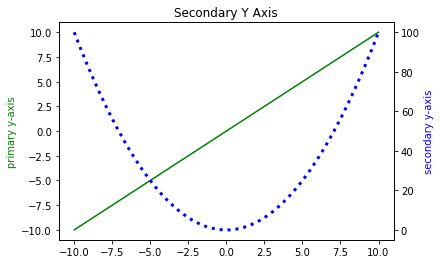

In [297]:
fig, ax1 = plt.subplots()
ax1.plot(x,y,"g")
ax1.set_ylabel(r"primary y-axis", color="green")

ax2 = ax1.twinx()
ax2.plot(x,z, "b:", linewidth=3)
ax2.set_ylabel(r"secondary y-axis", color="blue")

plt.title("Secondary Y Axis")

<ipython-input-299-e79e44186bd1>:2: RuntimeWarning: invalid value encountered in log
  y = np.log(x)
<ipython-input-299-e79e44186bd1>:3: RuntimeWarning: invalid value encountered in log2
  z = np.log2(x)
<ipython-input-299-e79e44186bd1>:4: RuntimeWarning: invalid value encountered in log10
  w = np.log10(x)


Text(0.5, 1.0, 'Manual Axis Range')

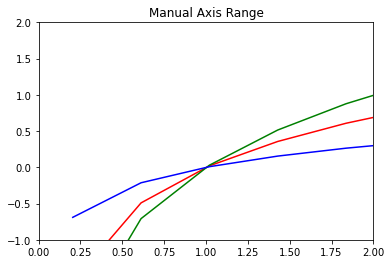

In [299]:
# manual
y = np.log(x)
z = np.log2(x)
w = np.log10(x)

plt.plot(x, y, "r", x, z, "g", x, w, "b")
plt.axis([0, 2, -1, 2])
plt.title("Manual Axis Range")

Text(0.5, 1.0, 'Manual Ticks on the x-axis')

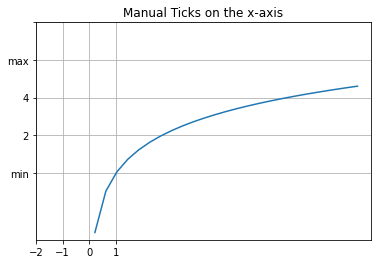

In [302]:
# manual ticks
plt.plot(x, y)
ax = plt.gca()

ax.xaxis.set_ticks(np.arange(-2, 2, 1))

ax.yaxis.set_ticks(np.arange(0, 5))
ax.yaxis.set_ticklabels(["min", 2, 4, "max"])

plt.grid(True)
plt.title("Manual Ticks on the x-axis")

Text(0.5, 1.0, 'Log Scaled Axis')

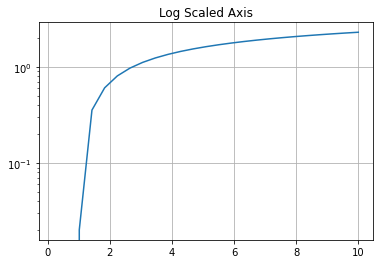

In [304]:
# scaling
plt.plot(x, y)
ax = plt.gca()

# values: log, logit, symlog
ax.set_yscale("log")
plt.grid(True)
plt.title("Log Scaled Axis")

Text(0.5, 1.0, 'Annotated Plot')

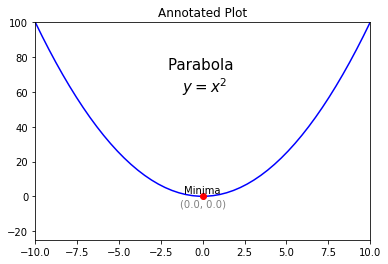

In [305]:
# annotations
y = x**2
min_x = 0
min_y = min_x**2

plt.plot(x, y, "b-", min_x, min_y, "ro")
plt.axis([-10, 10, -25, 100])

plt.text(0, 60, "Parabola \n $y = x^2$", fontsize=15, ha="center")
plt.text(min_x, min_y+2, "Minima", ha="center")
plt.text(min_x, min_y-6, "(%0.1f, %0.1f)"%(min_x, min_y), ha="center", color="gray")
plt.title("Annotated Plot")